In [195]:
%reset -f 
import pandas as pd
import matplotlib.pyplot as plt

In [196]:
datasets = ['datasets/drought.csv', 'datasets/diabetic_data.csv']
filename = datasets[1]
data = pd.read_csv(filename, na_values='?')

* ## Data Granularity

## Numeric

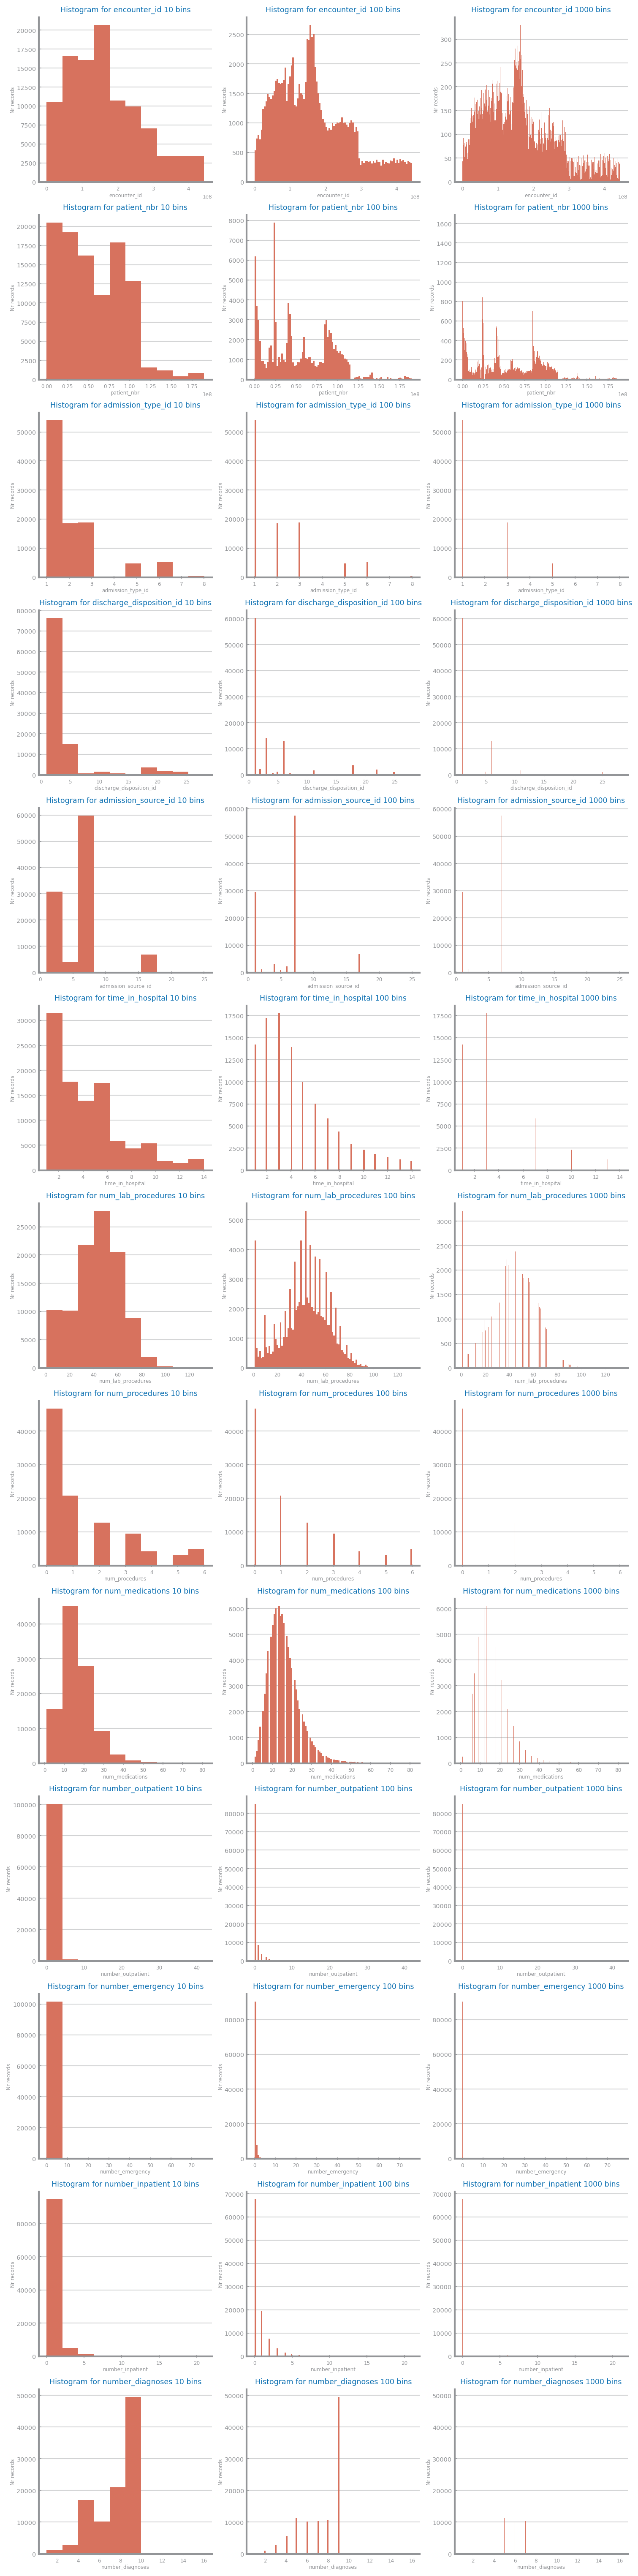

In [197]:
from ds_charts import get_variable_types, HEIGHT
from matplotlib.pyplot import subplots, savefig, show
from config import my_palette

variables = get_variable_types(data)['Numeric']
if [] == variables:
    raise ValueError('There are no numeric variables.')

rows = len(variables)
bins = (10, 100, 1000)
cols = len(bins)
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins'%(variables[i], bins[j]))
        axs[i, j].set_xlabel(variables[i])
        axs[i, j].set_ylabel('Nr records')
        axs[i, j].hist(data[variables[i]].values, bins=bins[j], color= my_palette['dark orange'])
#savefig('images/granularity_study.png')
show()

## Binary

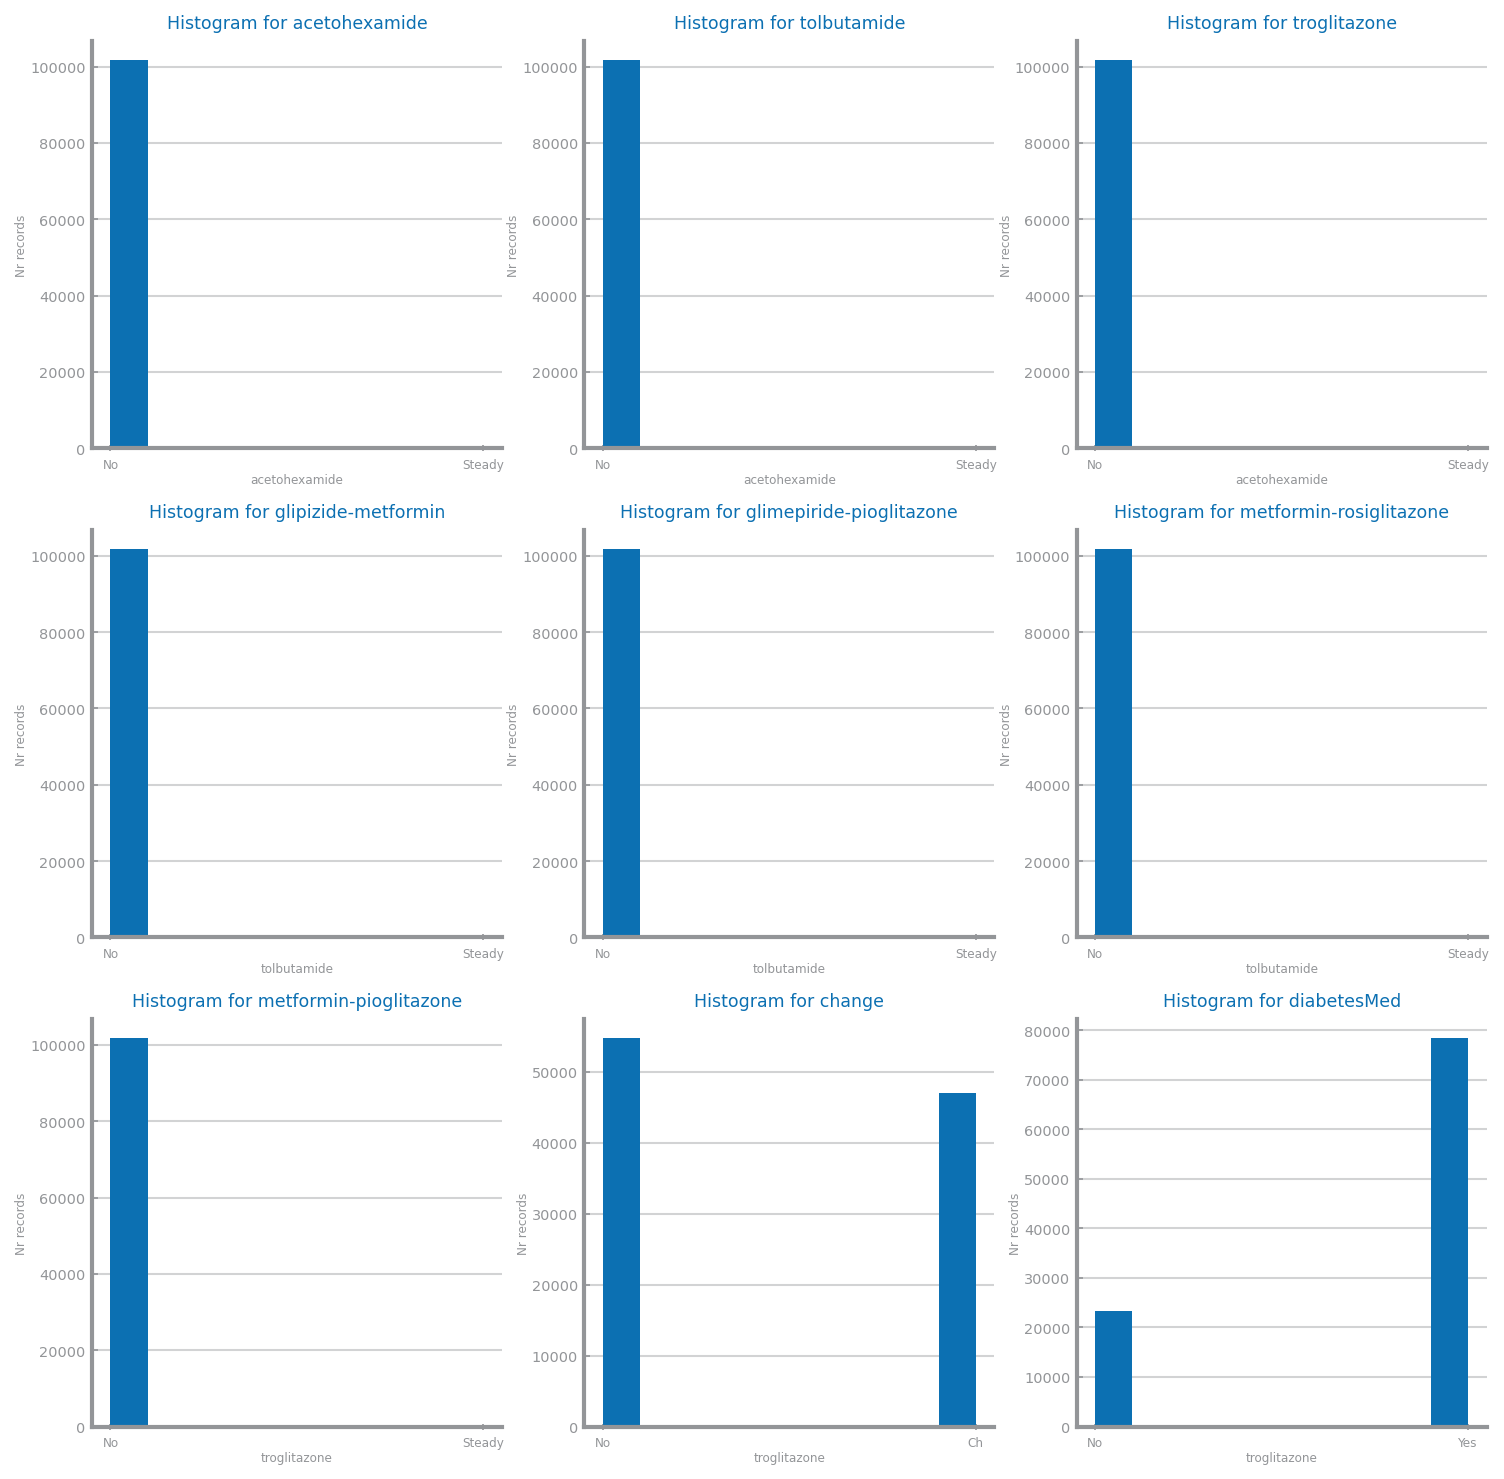

In [198]:
from ds_charts import get_variable_types, choose_grid, HEIGHT
from matplotlib.pyplot import subplots, savefig, show

variables = get_variable_types(data)['Binary']
if [] == variables:
    raise ValueError('There are no numeric variables.')

rows, cols = choose_grid(len(variables))
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)

i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s'%(variables[n]))
    axs[i, j].set_xlabel(variables[i])
    axs[i, j].set_ylabel('Nr records')
    axs[i, j].hist(data[variables[n]].values, color= my_palette['dark blue'])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
#savefig('images/granularity_single.png')
show()

## Symbolic

In [199]:

import pandas as pd
from ds_charts import get_variable_types, HEIGHT
from matplotlib.pyplot import subplots, savefig, show
from ds_charts import bar_chart

variables = get_variable_types(data)['Symbolic']
if [] == variables:
    raise ValueError('There are no numeric variables.')

data = pd.read_csv(filename)

mv = {}
x_values = [[0]]*len(variables)
y_values = [[0]]*len(variables)

for index,var in enumerate(variables):
    x_values[index] = list(set(data[var].values))
    x_values[index].sort()
    y_values[index] = [0]*len(x_values[index])
 
for index,var in enumerate(variables):
    for value in data[var].values:
        for i,name in enumerate(x_values[index]):
            if value == name:
                y_values[index][i] += 1

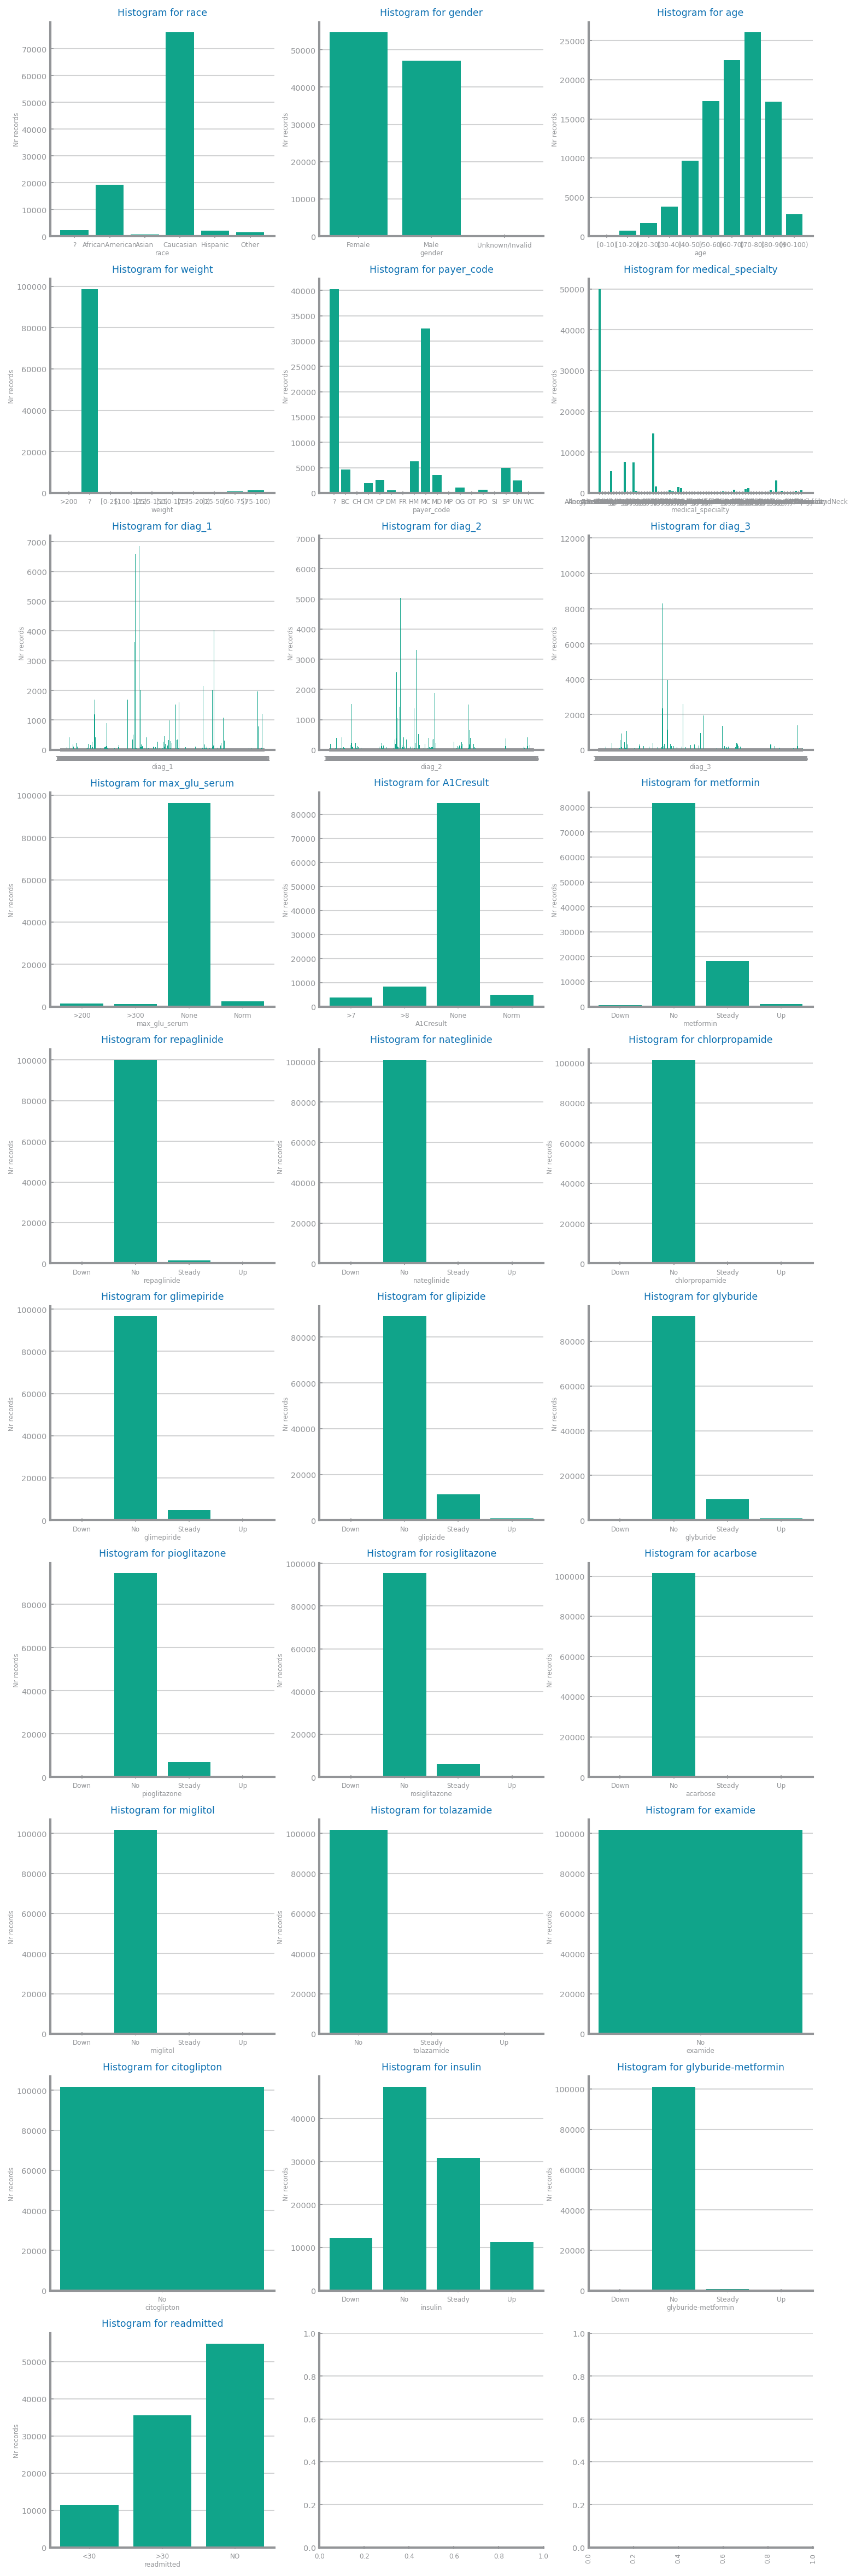

In [200]:
rows, cols = choose_grid(len(variables))
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)

i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s'%(variables[n]))
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('Nr records')
    plt.xticks(rotation='vertical')
    axs[i, j].bar(x_values[n], y_values[n], color= my_palette['green'])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
#savefig('images/granularity_single.png')
show()

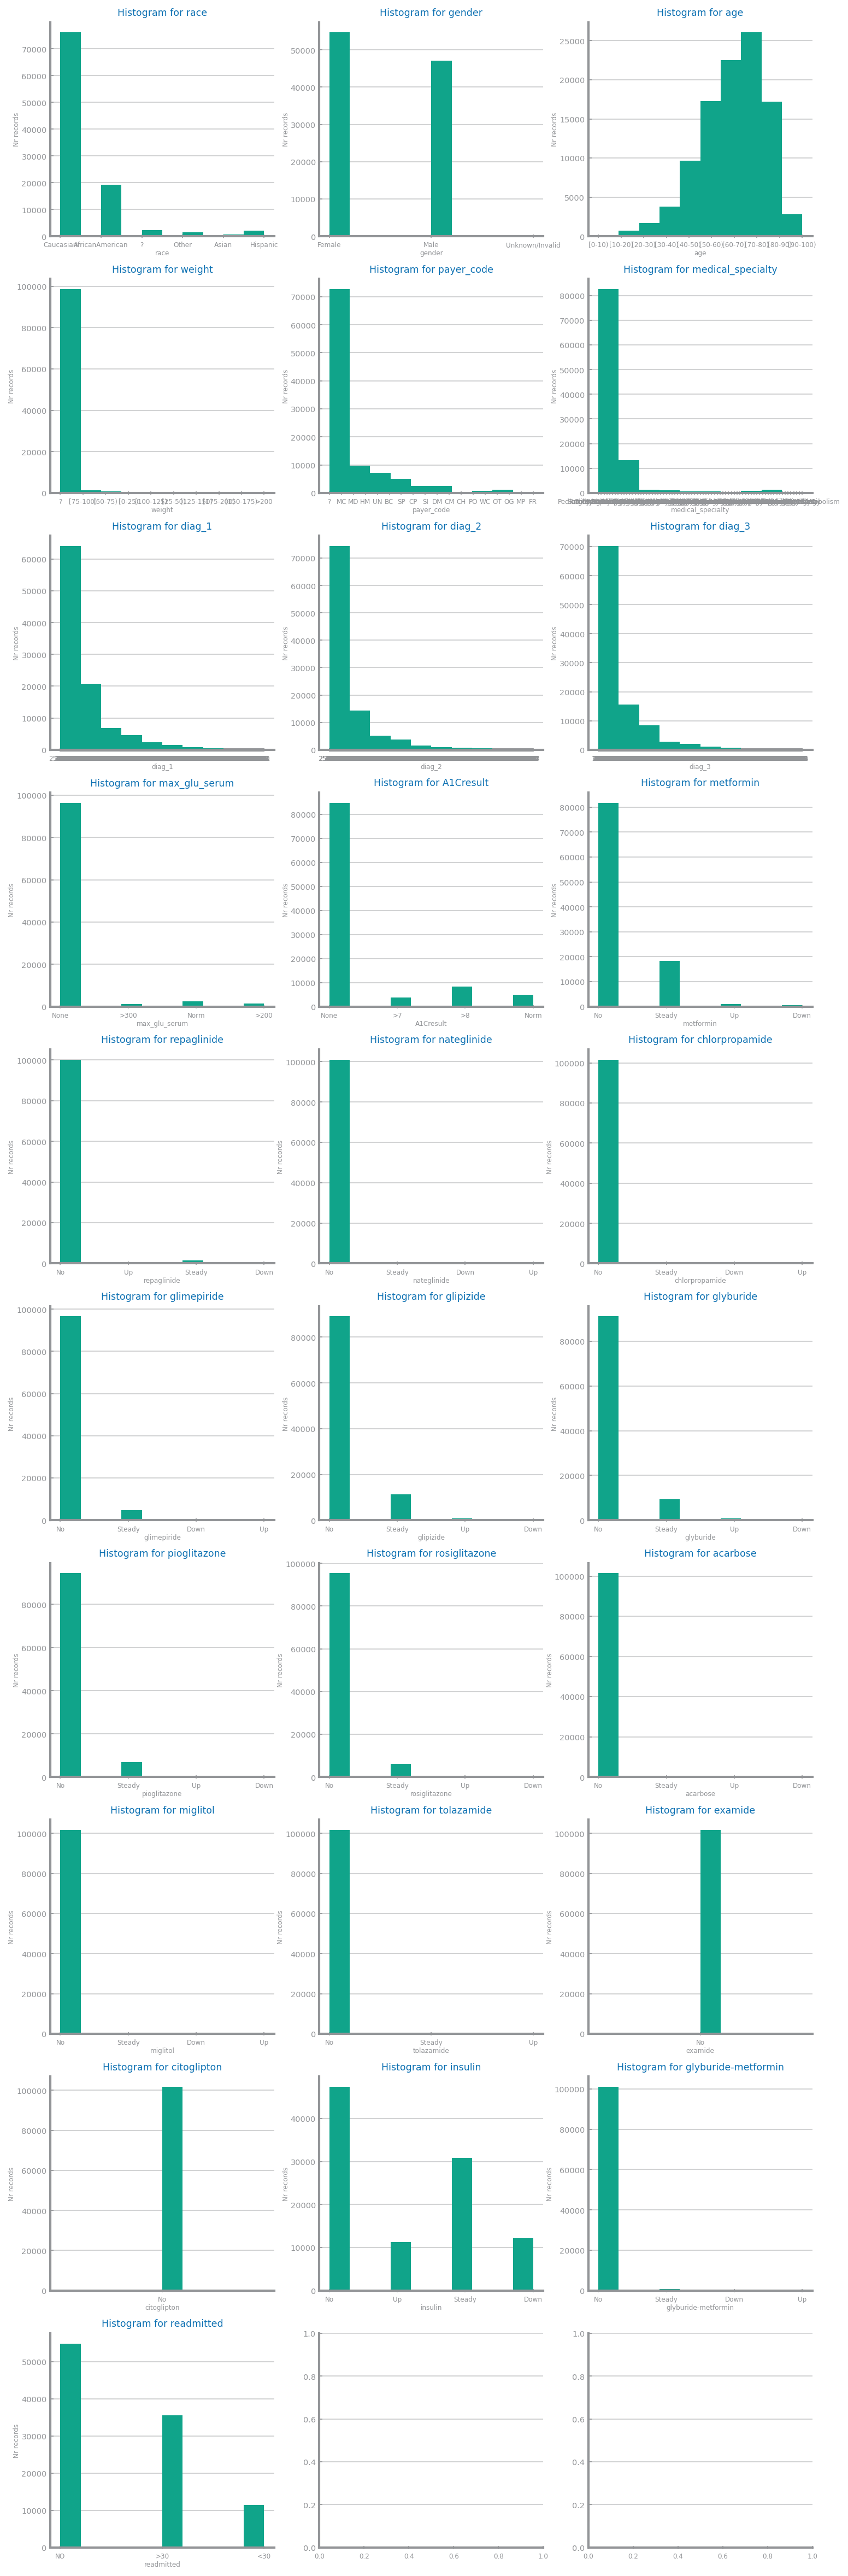

In [201]:
from ds_charts import get_variable_types, choose_grid, HEIGHT
from matplotlib.pyplot import subplots, savefig, show

variables = get_variable_types(data)['Symbolic']
if [] == variables:
    raise ValueError('There are no numeric variables.')

data = pd.read_csv(filename)

rows, cols = choose_grid(len(variables))
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)

i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s'%(variables[n]))
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('Nr records')
    axs[i, j].hist(data[variables[n]].values, color= my_palette['green'])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
#savefig('images/granularity_single.png')
show()